In [1]:
# Lasso Regression
# Car price prediction
# A lot of things to ignore here let's see what we can do

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [4]:
ds = pd.read_csv('Datum/CarPrice_Assignment.csv')
# Removal of dummy variables & car id
ds = ds.drop(['car_ID', 'CarName'], axis=1)
# Dummy variables
ds = pd.get_dummies(ds, drop_first=True)

In [5]:
y = ds['price']
X = ds.drop(['price'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [82]:
lasso = Lasso().fit(X_train, y_train)
lasso_2 = Lasso(alpha=12).fit(X_train, y_train) # Hıgher alpha means more restriction on the coefficients (more zero) | max_iter means how many times the model will run to find the best fit | tol means the tolerance
print('Training score: {}'.format(lasso_2.score(X_train, y_train)))
print('Test score: {}'.format(lasso_2.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso_2.coef_ != 0)))
print('Features Did not used: {}'.format(np.sum(lasso_2.coef_ == 0)))

Training score: 0.9355120101114254
Test score: 0.8936930944679504
Number of features used: 35
Features Did not used: 8


/home/kobruh/PycharmProjects/pythonProject2/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.340e+08, tolerance: 9.643e+05
  model = cd_fast.enet_coordinate_descent(


In [70]:
print('Training score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test score: {:.2f}'.format(lasso.score(X_test, y_test)))

Training score: 0.95
Test score: 0.85


In [71]:
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))
print('Features Did not used: {}'.format(np.sum(lasso.coef_ == 0)))

Number of features used: 40
Features Did not used: 3


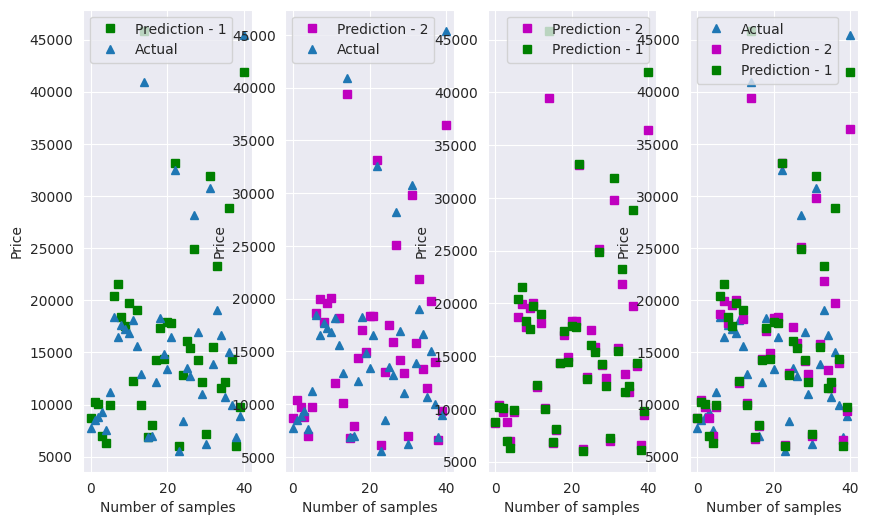

In [72]:
# Plotting prediction vs actual with lasso and lasso_2
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

ax[0].plot(lasso.predict(X_test), 'sg', label='Prediction - 1')
ax[0].plot(y_test.values, '^', label='Actual')
ax[0].set_xlabel('Number of samples')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(lasso_2.predict(X_test), 'sm', label='Prediction - 2')
ax[1].plot(y_test.values, '^', label='Actual')
ax[1].set_xlabel('Number of samples')
ax[1].set_ylabel('Price')
ax[1].legend()

ax[2].plot(lasso_2.predict(X_test), 'sm', label='Prediction - 2')
ax[2].plot(lasso.predict(X_test), 'sg', label='Prediction - 1')
ax[2].set_xlabel('Number of samples')
ax[2].set_ylabel('Price')
ax[2].legend()

ax[3].plot(y_test.values, '^', label='Actual')
ax[3].plot(lasso_2.predict(X_test), 'sm', label='Prediction - 2')
ax[3].plot(lasso.predict(X_test), 'sg', label='Prediction - 1')
ax[3].set_xlabel('Number of samples')
ax[3].set_ylabel('Price')
ax[3].legend()

plt.show()
# plt.figure(figsize=(10, 6))
# plt.plot(lasso.predict(X_test), 's', label='Prediction')
# plt.plot(y_test.values, '^', label='Actual')
# plt.xlabel('Number of samples')
# plt.ylabel('Price')
# plt.legend()
# plt.show()